In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

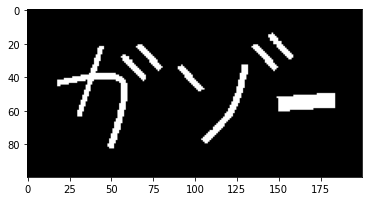

In [2]:
# binarize
img = cv2.cvtColor(cv2.imread("../gazo.png"), cv2.COLOR_BGR2GRAY).astype(np.int8)
img[img < 0] = 1
plt.imshow(img, cmap="gray")
plt.show()

In [3]:
def adjacent_number(img, y, x):
    H, W = img.shape
    h = [
        img[y, x], img[y, min(x+1, W-1)], img[max(0, y-1), min(x+1, W-1)],
        img[max(y-1, 0), x], img[max(y-1, 0), max(x-1, 0)], img[y, max(x-1, 0)],
        img[min(y+1, H-1), max(x-1, 0)], img[min(y+1, H-1), x], img[min(y+1, H-1), min(x+1, W-1)]
    ]
    return (h[1]-h[1]*h[2]*h[3]) + (h[3]-h[3]*h[4]*h[5]) + (h[5]-h[5]*h[6]*h[7]) + (h[7]-h[7]*h[8]*h[1])

In [4]:
def thinning(img, y, x):
    dy, dx = [0, 0, -1, 1, 1, 1, -1, -1], [1, -1, 0, 0, 1, -1, 1, -1]
    H, W = img.shape
    result = 0
    if img[y, x] != 0:
        result = 1
        found_zero = False
        for k in range(4):
            ny = min(H-1, max(0, y + dy[k]))
            nx = min(W-1, max(0, x + dx[k]))
            found_zero |= (img[ny, nx] == 0)
        
        adj = adjacent_number(img, y, x)
        
        cnt = 0
        for k in range(8):
            ny = min(H-1, max(0, y + dy[k]))
            nx = min(W-1, max(0, x + dx[k]))
            cnt += (img[ny, nx] == 1)
        
        if found_zero and adj == 1 and cnt >= 3:
            result = 0
    return result

In [5]:
H, W = img.shape
output_img = np.zeros((H, W), dtype=np.uint8)
while True:
    cnt = 0
    for i in range(H):
        for j in range(W):
            output_img[i, j] = thinning(img, i, j)
            cnt += (img[i, j] != output_img[i, j])
    if cnt > 0:
        img, output_img = output_img, img
    else:
        break

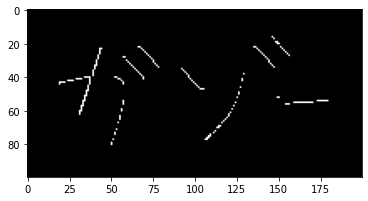

In [6]:
plt.imshow(output_img, cmap="gray")
plt.show()